In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income
0,Anuj,27,170000
1,Ramesh,29,90000
2,Suresh,29,61000
3,Shankar,28,150000
4,Narendra,42,155000


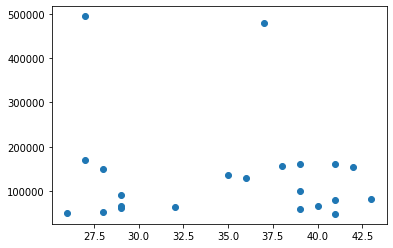

In [9]:
plt.scatter(df['Age'],df['Income'])

In [10]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
y_predicted=km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,Anuj,27,170000,0
1,Ramesh,29,90000,2
2,Suresh,29,61000,2
3,Shankar,28,150000,0
4,Narendra,42,155000,0


Text(0, 0.5, 'Income')

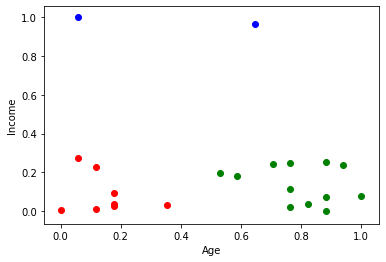

In [33]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='blue')

plt.xlabel("Age")
plt.ylabel("Income")


In [23]:
scaler=MinMaxScaler()
scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])


scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

df

,Name,Age,Income,cluster
0,Anuj,0.058824,0.272931,0
1,Ramesh,0.176471,0.093960,2
2,Suresh,0.176471,0.029083,2
3,Shankar,0.117647,0.228188,0
4,Narendra,0.941176,0.239374,0
5,Rajnath,0.764706,0.250559,0
6,Amit,0.882353,0.255034,0
7,Nirmala,0.705882,0.241611,0
8,Vaishali,0.588235,0.183445,0
9,Rohit,0.529412,0.199105,0


In [25]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [26]:
df['cluster']=y_predicted
df

,Name,Age,Income,cluster
0,Anuj,0.058824,0.272931,1
1,Ramesh,0.176471,0.093960,1
2,Suresh,0.176471,0.029083,1
3,Shankar,0.117647,0.228188,1
4,Narendra,0.941176,0.239374,0
5,Rajnath,0.764706,0.250559,0
6,Amit,0.882353,0.255034,0
7,Nirmala,0.705882,0.241611,0
8,Vaishali,0.588235,0.183445,0
9,Rohit,0.529412,0.199105,0


In [32]:
km.cluster_centers_

array([[0.79411765, 0.1412006 ],
       [0.14705882, 0.08920582],
       [0.35294118, 0.98322148]])

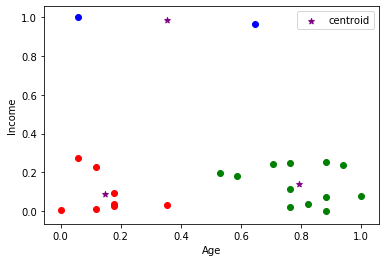

In [39]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [40]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit((df[['Age','Income']]))
    sse.append(km.inertia_)
    

In [41]:
sse

[4.0767685458266305,
 1.8594096633452848,
 0.6400872558495208,
 0.4665138375256792,
 0.30073762112367497,
 0.22208389017278524,
 0.15564124580958677,
 0.1139992435567202,
 0.0852377018899647]

Text(0, 0.5, 'Sum of squared error')

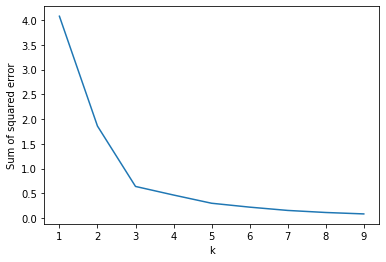

In [43]:
plt.plot(k_rng,sse)
plt.xlabel("k")
plt.ylabel("Sum of squared error")